In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

In [ ]:
k_values = [1, 5]
classifiers = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    classifiers.append(clf)

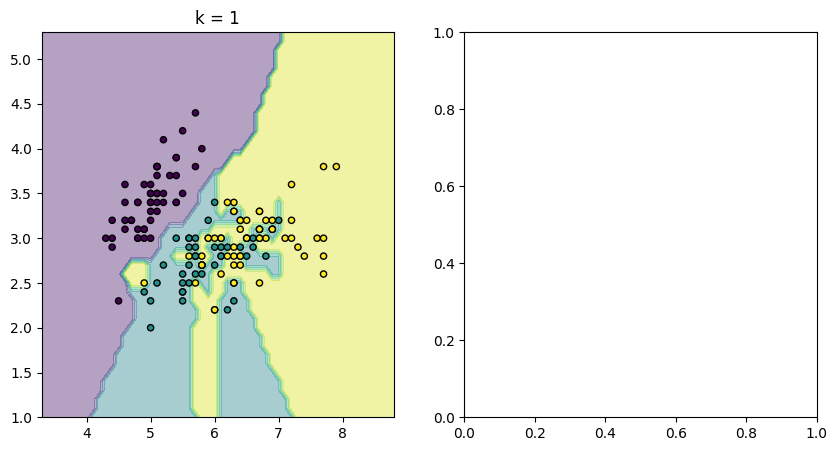

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, axarr = plt.subplots(1, 2, figsize=(10, 5))

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[i].contourf(xx, yy, Z, alpha=0.4)
    axarr[i].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[i].set_title(f'k = {k_values[i]}')
    plt.show()